In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv', index_col='Serial No.')

In [3]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 8)

In [5]:
y = data['Chance of Admit ']
X = data.drop('Chance of Admit ', axis=1)

In [10]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1


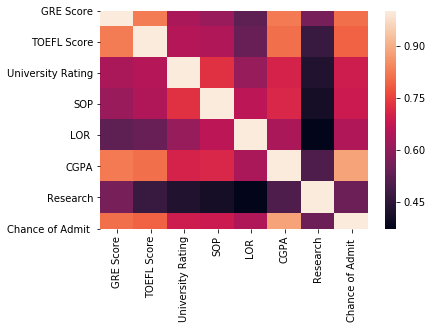

In [12]:
# 7 dimensional vector, trying to understand it is hard, so we reduce the dimensionality to 2 dimensions
# to further understand the interpretability of the data but at the same time by minimizing information loss 
#apparently PCA is used mainly for variables that are highly correlated, so for this dataset when all of it is high -> better chance of admit.
#just checking the correlation out aise
import seaborn as sns
sns.heatmap(data.corr())

In [14]:
#unsupervised learning algo
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

In [15]:
X_PCA

array([[-2.32738869e+01, -7.83279297e-01],
       [-6.81171502e+00,  3.35107573e+00],
       [ 1.84199136e+00,  2.68770757e+00],
       [-6.14081066e+00, -2.46601468e-02],
       [ 4.21202103e+00,  2.82440385e+00],
       [-1.56911213e+01, -1.17849363e+00],
       [-4.82852511e+00,  4.03697178e-01],
       [ 1.03744614e+01,  1.86884471e+00],
       [ 1.55278834e+01, -1.44152399e+00],
       [-6.16753035e+00,  2.17018008e+00],
       [-7.14989535e+00,  4.80778158e+00],
       [-1.12345301e+01,  1.10132929e+00],
       [-1.25670372e+01,  6.47321236e-01],
       [ 7.71504480e+00, -5.77773477e+00],
       [ 6.34981310e+00,  5.14161586e-01],
       [ 3.22703516e+00,  9.09629884e-01],
       [-3.88110318e-01,  3.85373255e-01],
       [-1.74160898e+00,  2.18732982e+00],
       [-2.58516989e+00, -1.85290368e+00],
       [ 1.43527052e+01, -1.28885335e+00],
       [ 4.19467298e+00, -1.68371857e+00],
       [-1.05396936e+01, -2.28234423e+00],
       [-1.44444241e+01, -3.07326464e+00],
       [-2.

In [18]:
#amalgmation of the other featueres 
X_PCA = pd.DataFrame(X_PCA, columns=['PC1','PC2'])

In [19]:
#by its nature, PCA will squish the principal componenets in order of importance
#PC1 is the axis on which the data is most spread out, PC2 is the second most.
#PC1 -> primary axis that underlies the whole data set
X_PCA

,PC1,PC2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


Text(0, 0.5, 'PC2')

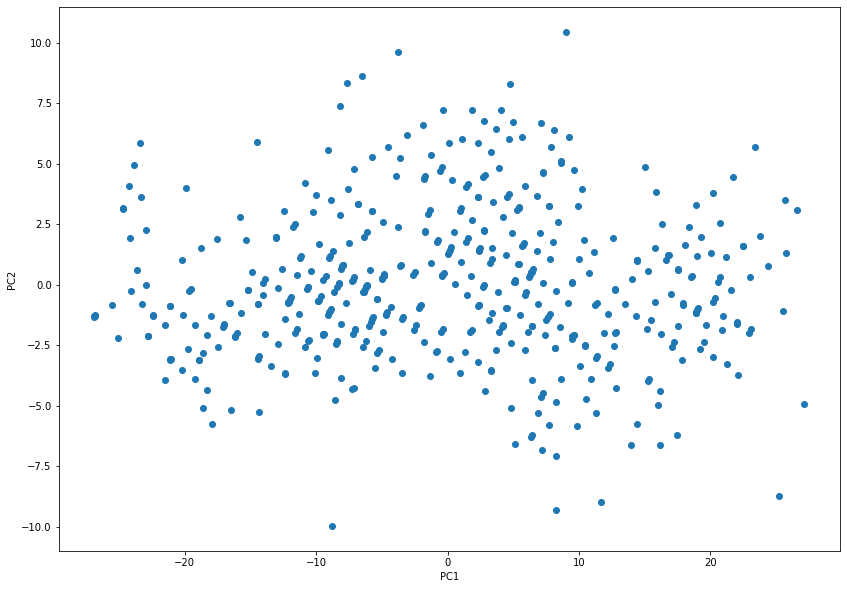

In [22]:
plt.figure(figsize=(14,10))
plt.scatter(X_PCA['PC1'], X_PCA['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [23]:
#highvalues of PC1 should represent one type of student
#lowvalues of PC1 should represent another type of student
#what do these students look like?

PCA_max = np.argmax(X_PCA['PC1']) #get the student that corresponds to the highest value of PC1
PCA_min = np.argmin(X_PCA['PC1']) #get min value of PC1

print(PCA_max) #student #377 has highest value of PC1
print(PCA_min) #student #202 has lowest value of PC1 
#looking at PC1 because PC1 is whats dominating the data set

377
202


C:\Users\Rajesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)
C:\Users\Rajesh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


In [25]:
#looking into these two students
X.iloc[PCA_max, :]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [26]:
X.iloc[PCA_min, :]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [27]:
# at high values of PC1, corresponds to students with low scores
# at low values of PC1, corresponds to students with high scores

In [31]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #combines fit and transform function
X

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

In [32]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model.score(X_test, y_test)
#score automates the prediction of your data using X_test and compares it with Y_test and by default uses the R-squared metric

0.8362469231464806

In [36]:
pred = model.predict(X_test)

In [37]:
pred

array([0.69148065, 0.9234821 , 0.56307681, 0.7282176 , 0.68802162,
       0.90403987, 0.76800343, 0.59570612, 0.5353176 , 0.60375779,
       0.6148155 , 0.81852832, 0.7221988 , 0.78116022, 0.66419781,
       0.79999213, 0.73162549, 0.7648651 , 0.58220773, 0.82844029,
       0.71545588, 0.70840759, 0.85634165, 0.77553663, 0.5974291 ,
       0.56525576, 0.63392033, 0.72563494, 0.650337  , 0.73991928,
       0.84128057, 0.8860277 , 0.98795056, 0.66199073, 0.71441928,
       0.64979507, 0.70159959, 0.58384709, 0.6076627 , 0.6490574 ,
       0.64612237, 0.99759426, 0.88097607, 0.78155786, 0.68336976,
       0.82839456, 0.83682146, 0.64560845, 0.67322778, 0.69258386,
       0.71787489, 0.5211862 , 0.60898808, 0.86448819, 0.81127418,
       0.65279416, 0.64921148, 0.5646978 , 0.56527764, 0.58788808,
       0.86005195, 0.69483214, 0.77076373, 0.51644733, 0.76359499,
       0.90598055, 0.85930357, 0.7648651 , 0.88268746, 0.51008877,
       0.52385265, 0.66776955, 0.65657947, 0.75720727, 0.60006

Text(0, 0.5, 'Actual Value')

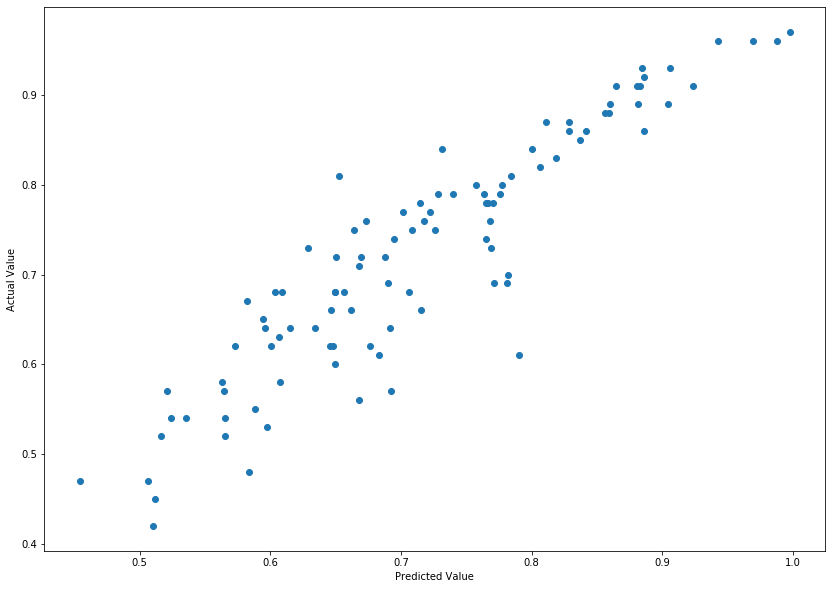

In [39]:
plt.figure(figsize=(14,10))
plt.plot(pred, y_test, 'o')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")